In [76]:
from PIL import Image
import time

In [77]:
# Convert encoding data into 8-bit binary
# form using ASCII value of characters
def genData(data):
    # List of binary codes for each character
    newd = []
    # Iterate over each character in the input data
    for i in data:
        # Get the 8-bit binary representation of the ASCII value of the character
        newd.append(format(ord(i), '08b'))
    # Return the list of binary codes
    return newd

In [78]:
def modPix(pix, data):
    # Convert data to a list of binary strings
    binary_data = genData(data)
    data_len = len(binary_data)    # Get the length of the data list
    pixel_iter = iter(pix) # Get an iterator for the image pixel data
    # Loop through each set of 3 pixels for each binary string in the data list
    for i in range(data_len):

        # Extract the next 3 pixels from the image pixel data
        pixel_values = [value for value in pixel_iter.__next__()[:3] + pixel_iter.__next__()[:3] + pixel_iter.__next__()[:3]]
        # Modify each pixel value based on the binary string
        for j in range(0, 8):
            if (binary_data[i][j] == '0' and pixel_values[j] % 2 != 0):
                pixel_values[j] -= 1
            elif (binary_data[i][j] == '1' and pixel_values[j] % 2 == 0):
                if (pixel_values[j] != 0):
                    pixel_values[j] -= 1
                else:
                    pixel_values[j] += 1

        # Modify the eighth pixel of each set to indicate whether to continue reading or stop
        if (i == data_len - 1):
            # If this is the last set of pixels, set the eighth pixel to 0 or 1 based on the parity of the current value
            if (pixel_values[-1] % 2 == 0):
                if (pixel_values[-1] != 0):
                    pixel_values[-1] -= 1
                else:
                    pixel_values[-1] += 1
        else:
            # If this is not the last set of pixels, set the eighth pixel to 0 if it is odd
            if (pixel_values[-1] % 2 != 0):
                pixel_values[-1] -= 1

        # Yield the modified pixel values in sets of 3
        pixel_values = tuple(pixel_values)
        yield pixel_values[0:3]
        yield pixel_values[3:6]
        yield pixel_values[6:9]

In [79]:
def encode_enc(image, data):
    # Get the width of the image
    image_width = image.size[0]

    # Start at the top-left corner of the image
    x_coord = 0
    y_coord = 0

    # Loop over each modified pixel and add it to the new image
    for modified_pixel in modPix(image.getdata(), data):

        # Put the modified pixel in the new image
        image.putpixel((x_coord, y_coord), modified_pixel)

        # Move to the next row if at the end of the current row
        if x_coord == image_width - 1:
            x_coord = 0
            y_coord += 1
        else:
            x_coord += 1

In [80]:
# Encode data into image
def encode():
    # Get the filename of the image to be encoded
    image_filename = input("Enter image name (with extension): ")

    # Open the image
    image = Image.open(image_filename, 'r')

    # Display the image
    image.show()

    # Get the data to be encoded
    data = input("Enter data to be encoded: ")

    # Raise an error if the data is empty
    if len(data) == 0:
        raise ValueError('Data is empty')

    # Create a copy of the image to modify
    new_image = image.copy()

    # Record the start time for encryption
    start_time = time.time()

    # Encode the data in the new image
    encode_enc(new_image, data)
    # Record the end time for encryption
    end_time = time.time()
    # Print the time taken for encryption
    print(f"Time taken for encryption: {end_time - start_time:.5f} seconds")

    # Get the filename of the new image
    new_image_filename = input("Enter the name of new image (with extension): ")

    # Save the new image with the appropriate file format
    new_image.save(new_image_filename, str(new_image_filename.split(".")[1].upper()))

In [81]:
# Decode the data in the image
def decode():
     # Get the filename of the image to be decoded
    image_filename = input("Enter image name (with extension): ")
    # Record the start time for decryption
    start_time = time.time()
    # Open the image
    image = Image.open(image_filename, 'r')
    # Initialize an empty string to store the decoded data
    decoded_data = ''
    # Get an iterator for the image data
    image_data = iter(image.getdata())

    while True:
        # Get the RGB values of the next three pixels
        pixels = [value for value in image_data.__next__()[:3] +image_data.__next__()[:3] +
                                image_data.__next__()[:3]]

        # Convert the least significant bit of each pixel to binary and append to binstr
        binstr = ''
        for i in pixels[:8]:
            if i % 2 == 0:
                binstr += '0'
            else:
                binstr += '1'
        # Convert the binary string to a character and append to the decoded data
        decoded_data += chr(int(binstr, 2))
        # Check if the last pixel's least significant bit is 1
        if pixels[-1] % 2 != 0:
            # Record the end time for decryption
            end_time = time.time()
            # Print the time taken for decryption
            print(f"Time taken for decryption: {end_time - start_time:.5f} seconds")
            return decoded_data

In [82]:
# Main Function
def incript():
    a = int(input(":: Welcome to Steganography ::\n"
                        "1. Encode\n2. Decode\n"))
    if (a == 1):
        encode()

    elif (a == 2):
        print("Decoded Word :  " + decode())
    else:
        raise Exception("Enter correct input")


In [83]:
from google.colab import files
uploaded = files.upload()

Saving demo.png to demo (6).png


In [84]:
incript()

:: Welcome to Steganography ::
1. Encode
2. Decode
1
Enter image name (with extension): demo.png
Enter data to be encoded: Data security is the process of safeguarding digital information throughout its entire life cycle to protect it from corruption, theft
Time taken for encryption: 0.00246 seconds
Enter the name of new image (with extension): decdemo.png


In [85]:
incript()

:: Welcome to Steganography ::
1. Encode
2. Decode
2
Enter image name (with extension): decdemo.png
Time taken for decryption: 0.03736 seconds
Decoded Word :  Data security is the process of safeguarding digital information throughout its entire life cycle to protect it from corruption, theft


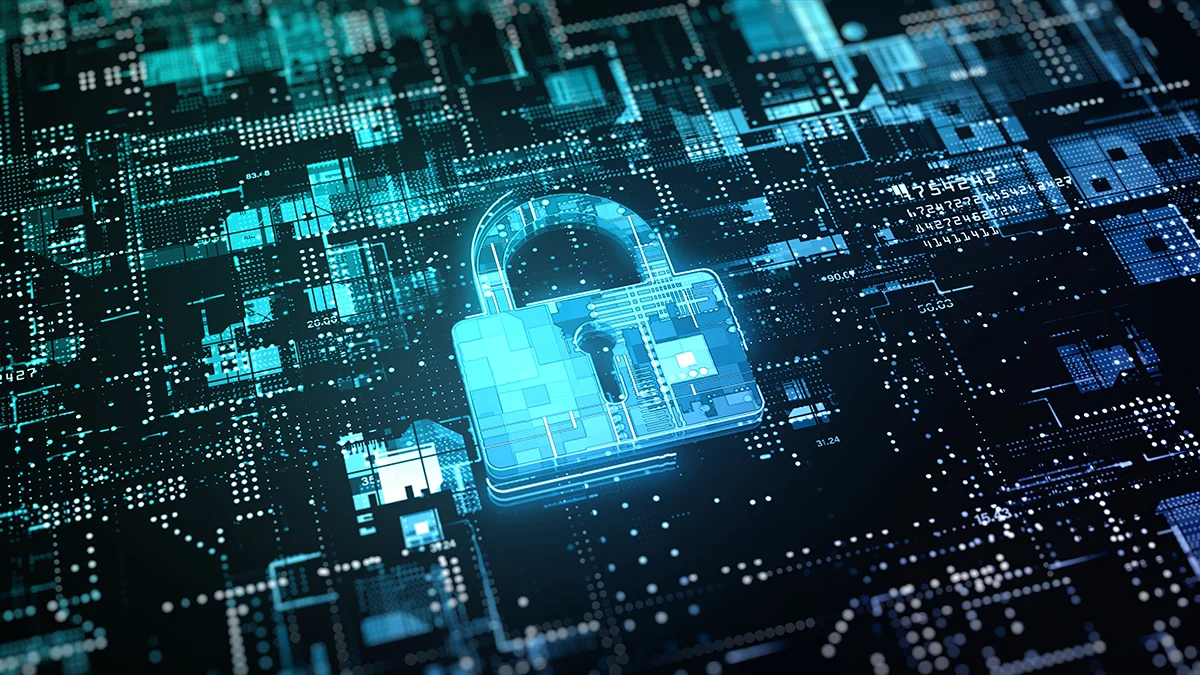

In [87]:
from IPython.display import Image
Image('demo.png',width=500, height=500)

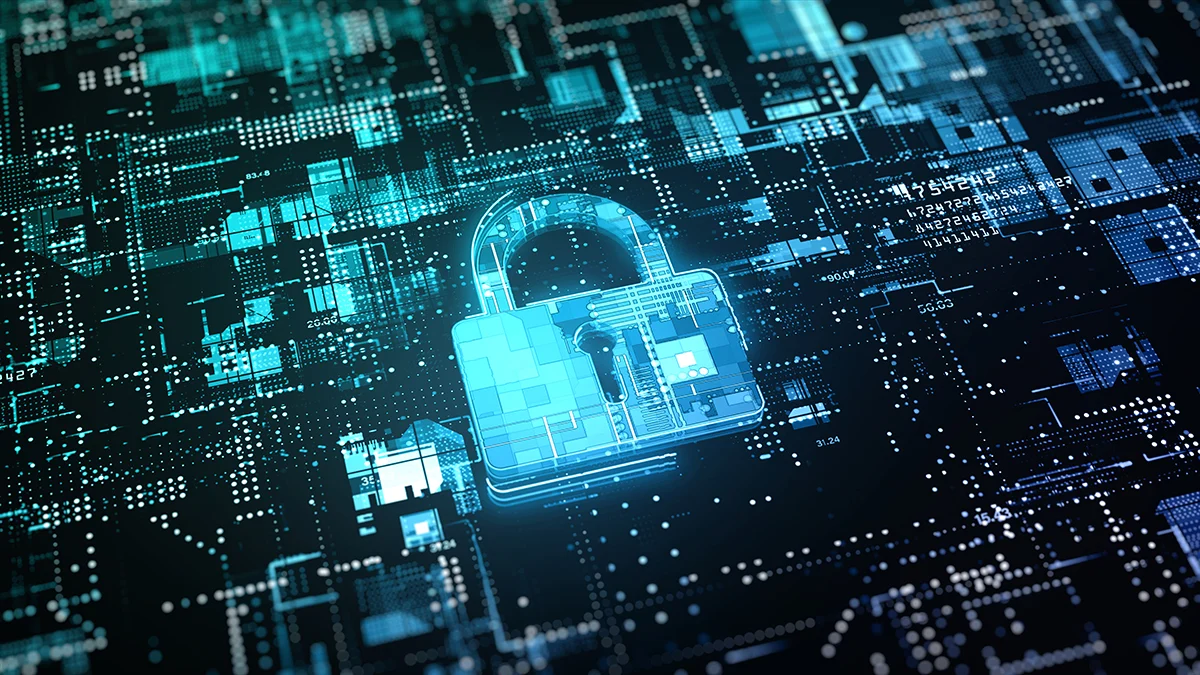

In [88]:
from IPython.display import Image
Image('decdemo.png',width=500, height=500)